In [13]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import tensorflow as tf
import sys
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
%matplotlib inline
# np행렬 생략 부분 출력 펼쳐서 보기 옵션
np.set_printoptions(threshold=np.inf, linewidth=np.inf)

In [24]:
# 코드 뜯어봐야함..

from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# sorting based on index
idx = np.argsort(train_labels)
train_images = train_images[idx]
train_labels = train_labels[idx]

idx = np.argsort(test_labels)
test_images = test_images[idx]
test_labels = test_labels[idx]

labels = ["T-Shirt", "Trouser", "Pullover", "Dress", "Coat", 
          "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

label_mapping = dict(zip(labels, range(10)))

def get_data(mapping, classes):
    # X_train, X_test, y_train, y_test = np.array([]), np.array([]), np.array([]), np.array([])
    X_train, X_test, y_train, y_test = [],[],[],[]
    for cls in classes:
        idx = mapping[cls]
        start = idx*6000
        end = idx*6000+6000
        X_train.append(train_images[start: end])
        # X_train = np.append(X_train, train_images[start: end])
        y_train.append(train_labels[start: end])
        # y_train = np.append(X_train, train_labels[start: end])
        start = idx*1000
        end = idx*1000+1000
        X_test.append(test_images[start: end])
        # X_test = np.append(X_test, test_images[start: end])
        y_test.append(test_labels[start: end])
        # y_test = np.append(y_test, test_labels[start: end])
    return X_train, X_test, y_train, y_test


train_X, test_X, train_Y, test_Y = get_data(label_mapping, 
                                            classes=["T-Shirt", "Trouser", "Coat", "Pullover", "Shirt"])

In [25]:
# test_Y 5개의 어레이를 1개의 어레이로 만들기 
empty_array1 = np.array([])
# print(type(d))
for arr in test_Y:
    # print(type(arr))
    empty_array1 = np.append(empty_array1,arr)
test_Y = empty_array1

# train_Y 5개의 어레이를 1개의 어레이로 만들기
empty_array2 = np.array([])

for arr in train_Y:
    empty_array2 = np.append(empty_array2, arr)
train_Y = empty_array2

train_Y.shape, test_Y.shape

((30000,), (5000,))

In [26]:
# test_X 리스트를 하나의 array로 만들어 주기 위해서 컬럼 별로 나누는 과정.
for idx, img in enumerate(test_X):
    if idx == 0 :
        test_img0 = img
    elif idx == 1:
        test_img1 = img
    elif idx == 2:
        test_img2 = img
    elif idx == 3:
        test_img3 = img
    else:
        test_img4 = img
print(test_img0.shape, test_img1.shape, test_img2.shape, test_img3.shape, test_img4.shape)

# train_X 리스트를 하나의 array로 만들어 주기 위해서 컬럼 별로 나누는 과정.
for idx, img in enumerate(train_X):
    if idx == 0 :
        train_img0 = img
    elif idx == 1:
        train_img1 = img
    elif idx == 2:
        train_img2 = img
    elif idx == 3:
        train_img3 = img
    else:
        train_img4 = img

print(train_img0.shape, train_img1.shape, train_img2.shape, train_img3.shape, train_img4.shape)

(1000, 28, 28) (1000, 28, 28) (1000, 28, 28) (1000, 28, 28) (1000, 28, 28)
(6000, 28, 28) (6000, 28, 28) (6000, 28, 28) (6000, 28, 28) (6000, 28, 28)


In [ ]:
# In [1]: a = np.array([1, 2, 3])

# In [2]: b = np.array([4, 5, 6])

# In [3]: np.vstack((a, b))
# Out[3]: 
# array([[1, 2, 3],
#        [4, 5, 6]])

In [27]:
# test_X 하나로 합쳐주는 과정
test_img0 = np.vstack((test_img0, test_img1))
test_img0 = np.vstack((test_img0, test_img2))
test_img0 = np.vstack((test_img0, test_img3))
test_X = np.vstack((test_img0, test_img4))

# train_X 하나로 합쳐주는 과정
train_img0 = np.vstack((train_img0, train_img1))
train_img0 = np.vstack((train_img0, train_img2))
train_img0 = np.vstack((train_img0, train_img3))
train_X = np.vstack((train_img0, train_img4))

print(train_X.shape, test_X.shape)

(30000, 28, 28) (5000, 28, 28)


In [28]:
train_X.shape, test_X.shape, train_Y.shape, test_Y.shape

((30000, 28, 28), (5000, 28, 28), (30000,), (5000,))

In [ ]:
# shuffle 해주기 위해 trian test 통으로 묶어서 셔플 가능?

In [7]:
# 기존에 데이터 불러오는 코드
# fashion_mnist = tf.keras.datasets.fashion_mnist
# (train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()
# # print(len(train_X), len(test_X))
# # train_X.shape, test_X.shape, train_Y.shape, test_Y.shape

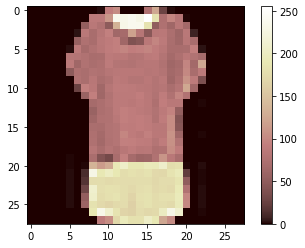

In [29]:
plt.imshow(train_X[2], cmap='pink')
plt.colorbar()
plt.show()
# print('정답범주', train_Y[2])

In [30]:
train_X = train_X / 255.0
test_X = test_X / 255.0
# print(train_X[2])

In [31]:
# 다층 퍼셉트론
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

In [ ]:
# 밑에 vggnet 모방 코드 사용 하려면 여기 셀 실행 해야함/ input 을 맞춰주기 위함.

print(train_X.shape, test_X.shape)
# (미니배치크기, 입력이미지행수, 입력이미지열수, 입력이미지체널수)
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)
print(train_X.shape, test_X.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


In [ ]:
# vggnet 모방 모델
model= tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1),kernel_size=(3,3),filters=32,padding='same',activation='relu'),
    tf.keras.layers.Conv2D(input_shape=(28,28,1),kernel_size=(3,3),filters=64,padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D(strides = (2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters = 128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters = 256, padding = 'valid', activation='relu'),
    tf.keras.layers.MaxPool2D(strides = (2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation = 'relu'),
    tf.keras.layers.Dropout(rate = 0.5),
    tf.keras.layers.Dense(units=256, activation = 'relu'),
    tf.keras.layers.Dropout(rate = 0.5),
    tf.keras.layers.Dense(units=10, activation = 'softmax')
])

In [32]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [33]:
history = model.fit(train_X, train_Y, epochs=500, validation_split=0.25,
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss')])

Epoch 1/500
704/704 [==============================] - 1s 2ms/step - loss: 0.3088 - accuracy: 0.8910 - val_loss: 13.9971 - val_accuracy: 0.1665
Epoch 2/500
704/704 [==============================] - 1s 2ms/step - loss: 0.2311 - accuracy: 0.9168 - val_loss: 14.0721 - val_accuracy: 0.1720
Epoch 3/500
704/704 [==============================] - 1s 2ms/step - loss: 0.2115 - accuracy: 0.9228 - val_loss: 13.4568 - val_accuracy: 0.1575
Epoch 4/500
704/704 [==============================] - 1s 2ms/step - loss: 0.1996 - accuracy: 0.9268 - val_loss: 14.9096 - val_accuracy: 0.1697
Epoch 5/500
704/704 [==============================] - 1s 2ms/step - loss: 0.1878 - accuracy: 0.9313 - val_loss: 15.7324 - val_accuracy: 0.1340
Epoch 6/500
704/704 [==============================] - 1s 2ms/step - loss: 0.1802 - accuracy: 0.9338 - val_loss: 15.5753 - val_accuracy: 0.1571
Epoch 7/500
704/704 [==============================] - 1s 2ms/step - loss: 0.1704 - accuracy: 0.9371 - val_loss: 18.0986 - val_accuracy:

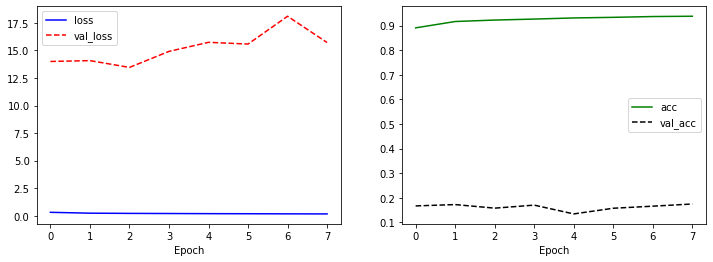

In [34]:
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label = 'loss')
plt.plot(history.history['val_loss'],'r--',label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label = 'acc')
plt.plot(history.history['val_accuracy'],'k--',label = 'val_acc')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [35]:
model.evaluate(test_X,test_Y)

157/157 [==============================] - 0s 952us/step - loss: 4.1174 - accuracy: 0.7304


[4.117371082305908, 0.730400025844574]

In [ ]:
# 예측수행 부분... 우리가 가지고 있는 사진을 넣었을때, 이 이미지에 대한 예측 범주 출력
# 수업시간때는, 테스트 데이터 안의 사진을 가지고 수행하였다.
# 이미지 불러오는 방법 찾아보기
# 불러온 이미지 변수에 담아서, model.predict(변수명)
# 예측 수행 범주 확인해주기.

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1751: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


(221, 195, 3)
########################################
VERSION : 1.1 
 Interesting tools to be added to the workflow pipe!!!
########################################


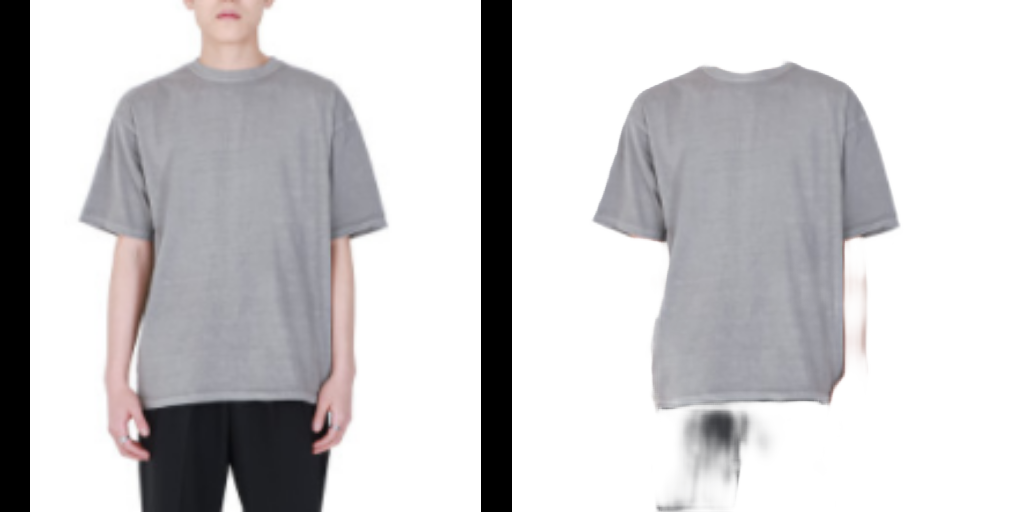

In [41]:
# 모델 임포트 후 의상 부분만 추출하는 코드.

# GPU메모리 증가 허용하기 코드..내가 알아야할 필요가 있을지..? 뭔 이야기인지는 모르겠음.
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

# 이미지를 계속해서 바꿔바며 할수 있는 방법을 생각해야함 요기 f는 경로 입력.
f = '/content/반팔티예시.png'
# 훈련된 모델 가지고 오는 경로 설정.
saved = load_model("/content/drive/My Drive/Colab Notebooks/데이터/topwears.h5")

class fashion_tools(object):
    def __init__(self,imageid,model,version=1.1):
        self.imageid = imageid
        self.model   = model
        self.version = version
        
    def get_dress(self,stack=False):
        """limited to top wear and full body dresses (wild and studio working)"""
        """takes input rgb ----> return PNG"""

        name =  self.imageid
        file = cv2.imread(name)
        print(file.shape)

        # b,g,r= cv2.split(file)
        # file = cv2.merge([b,g,r])

        file = tf.image.resize_with_pad(file,target_height=512,target_width=512)
        rgb  = file.numpy()
        file = np.expand_dims(file,axis=0)/ 255.
        seq = self.model.predict(file)
        seq = seq[3][0,:,:,0]
        seq = np.expand_dims(seq,axis=-1)
        c1x = rgb*seq
        c2x = rgb*(1-seq)
        cfx = c1x+c2x
        dummy = np.ones((rgb.shape[0],rgb.shape[1],1))
        rgbx = np.concatenate((rgb,dummy*255),axis=-1)
        rgbs = np.concatenate((cfx,seq*255.),axis=-1)
        if stack:
            stacked = np.hstack((rgbx,rgbs))
            return stacked
        else:
            return rgbs
        
    def get_patch(self):
        return None

    def development(self):
        n_ = '\n'
        return (f"VERSION : {self.version} {n_} Interesting tools to be added to the workflow pipe!!!")

###running code
api    = fashion_tools(f,saved)
image = api.get_dress(True)

print("########################################")
print(api.development())
print("########################################")

# cv2.imwrite('result.jpeg', image_)
cv2_imshow(image)
# print(image.shape)

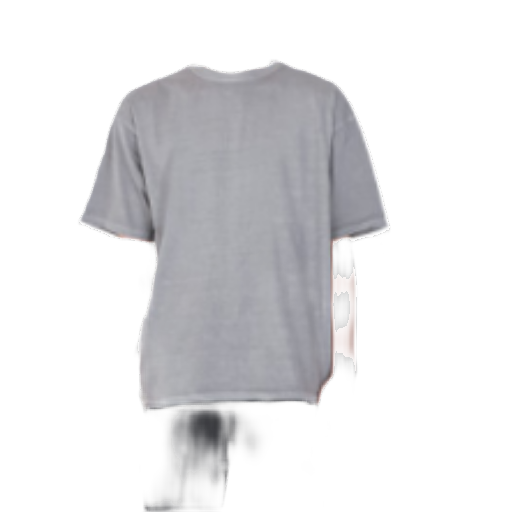

In [42]:
# 이미지 자르고, 투명값 검정배경 입혀주기.

image_crop = image[:,512:]
image_crop = np.uint8(image_crop)
# cv2_imshow(image_crop)

for i in image_crop:
    for j in i:
        if j[3] < 40:
            j[0] = 0
            j[1] = 0
            j[2] = 0

cv2_imshow(image_crop)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 164   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 159 156 155 160 165 153 149 151 154 153   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 158 155 166 164 168 165 160 160 163 165 160 146   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 176 165 161 164 167 166 167 165 165 167 168 165 152 217   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 157 153 166 171 172 170 167 168 167 169 159 170 152 152   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 158 105 174 166 172 170 170 172 169 165 159 166 151 15

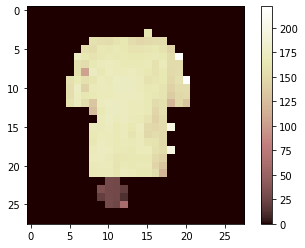

(1, 28, 28)

In [43]:
# 리사이즈 인풋값 맞춰 주기.
image_resize = cv2.resize(image_crop, (28,28))
cv2_imshow(image_resize)

# 그레이 스케일.. 후 픽셀 출력..
image_gray = cv2.cvtColor(image_resize, cv2.COLOR_BGRA2GRAY)
cv2_imshow(image_gray)
print(image_gray)

# 조금 더 크게 시각화..
plt.imshow(image_gray, cmap='pink')
plt.colorbar()
plt.show()

# 정규화 해준다.
input_image = image_gray/255.0

# input값이 3차원 이여서 차원을 늘려준다.
input_image = np.reshape(input_image, (1,28,28))
input_image.shape

In [ ]:
# 기존 데이터 예측 범주
# 0 : 티셔츠 / 상의
# 1 : 바지
# 2 : 스웨터
# 3 : 드레스
# 4 : 코트
# 5 : 샌들
# 6 : 셔츠
# 7 : 운동화
# 8 : 가방
# 9 : 부츠


# 수정한 데이터 범주 순서
# ["T-Shirt", "Trouser", "Coat", "Pullover", "Shirt"]

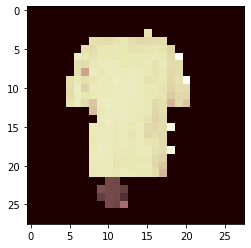

[[1.8784533 1.0066471 1.0529616 1.0000073 1.0618879 1.0000117 1.0000033 1.0000197 1.000003  1.0000052]]


In [67]:
#예측 수행
input_predict = model.predict(input_image)+1
#예측 이미지 확인 
plt.imshow(input_image.reshape(28,28), cmap = 'pink')
plt.show()

#예측 결과 확인
print(input_predict)

In [68]:
max_value = np.max(input_predict)
# print(max_value)
max_idx = np.where(input_predict == max_value)
# print(max_idx)
# print(max_idx[1][0])
predict_idx = max_idx[1][0]
predict_idx

0

In [ ]:
# 과적합현상.. 있는 듯 보임?  추측,,,
# 데이터양에 비해 다층 퍼셉트론 모델이 무거운 듯 보임..??  추측...

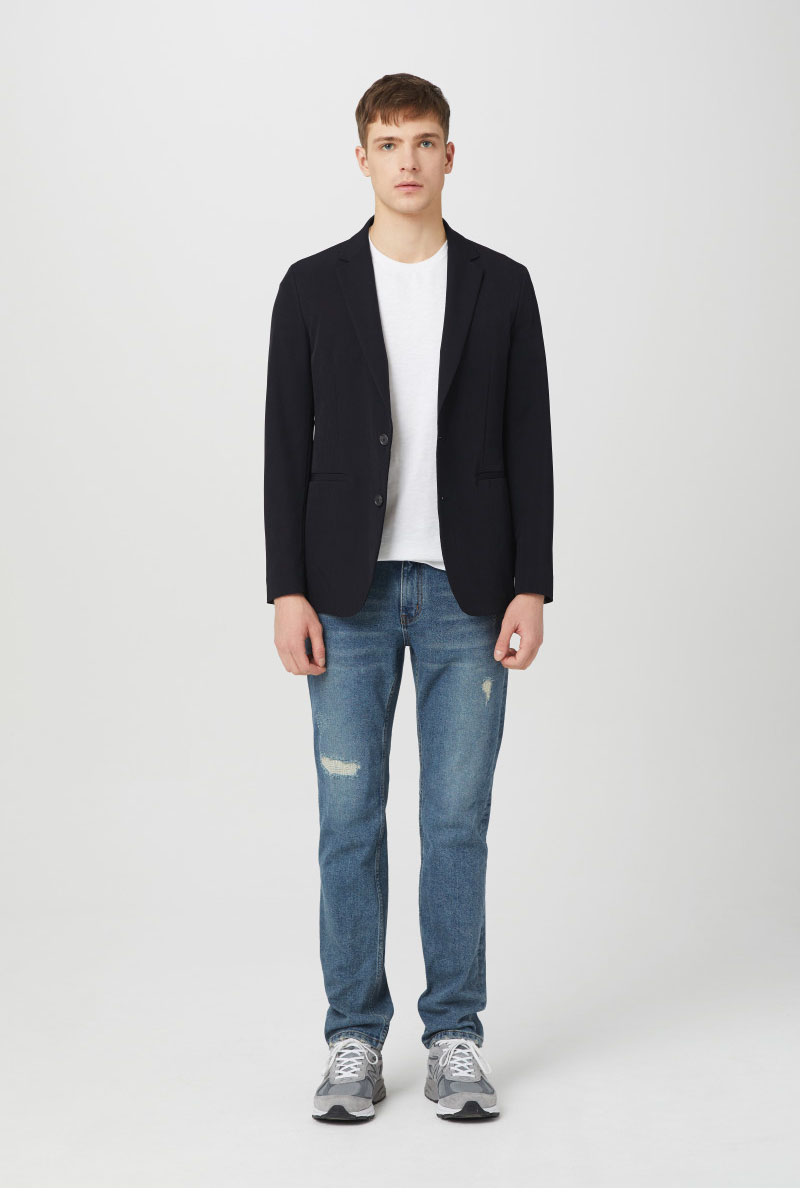

https://www.lfmall.co.kr/product.do?cmd=getProductDetail&PROD_CD=JNJA9B583N3&etag1=004_A011_E043&etag2=0&etag3=23&etag4=1017
******************************************************************************************************************************************************
******************************************************************************************************************************************************
******************************************************************************************************************************************************
******************************************************************************************************************************************************


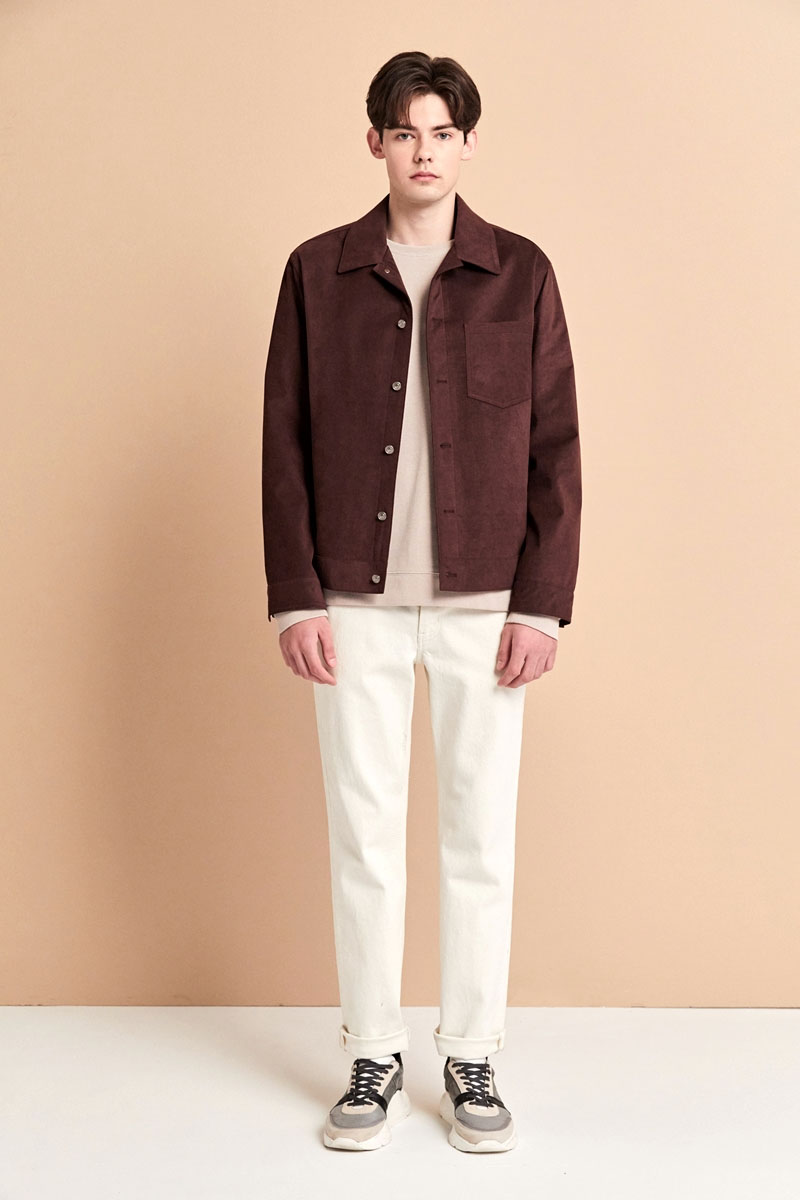

https://www.lfmall.co.kr/product.do?cmd=getProductDetail&PROD_CD=JNJU0D704D2&ITHR_CD=IT0401&etag1=009_A019_E269&etag2=0&etag3=1&etag4=JNTS0B750WT


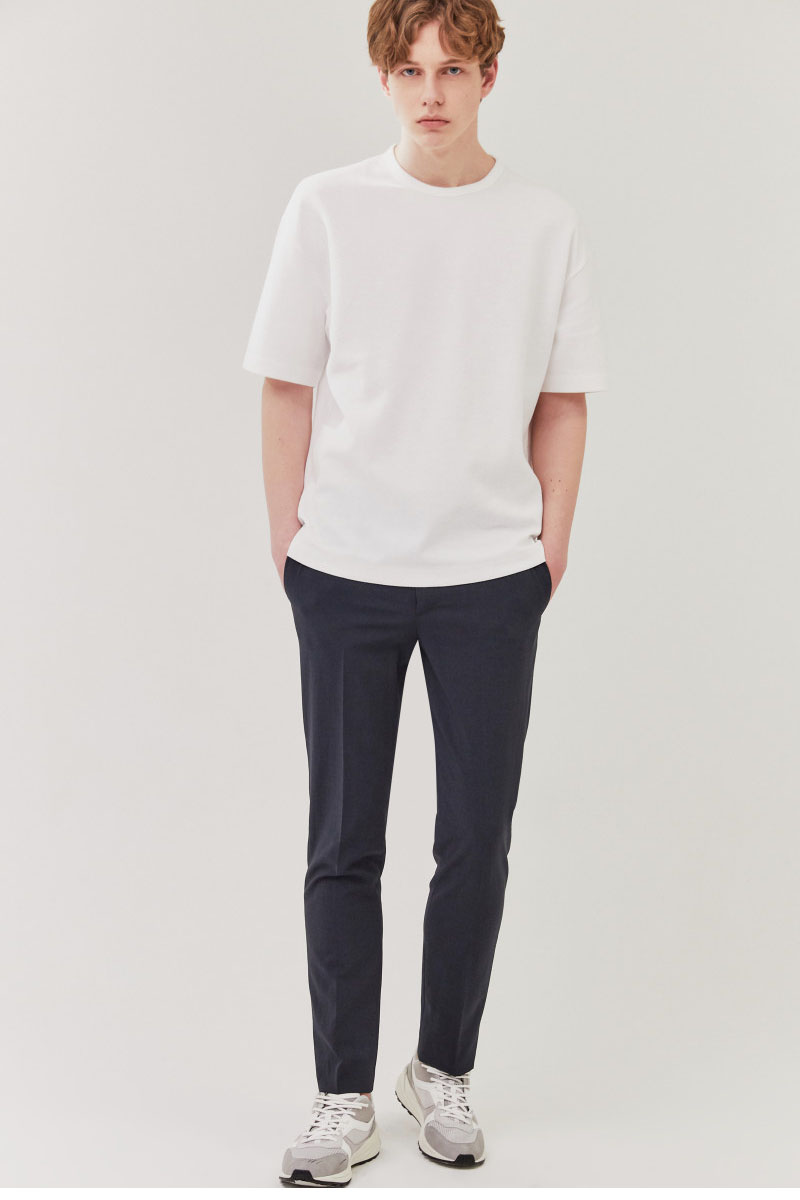

https://www.lfmall.co.kr/product.do?cmd=getProductDetail&origin=outlet&PROD_CD=WYPA9B083T2&ITHR_CD=IT0401


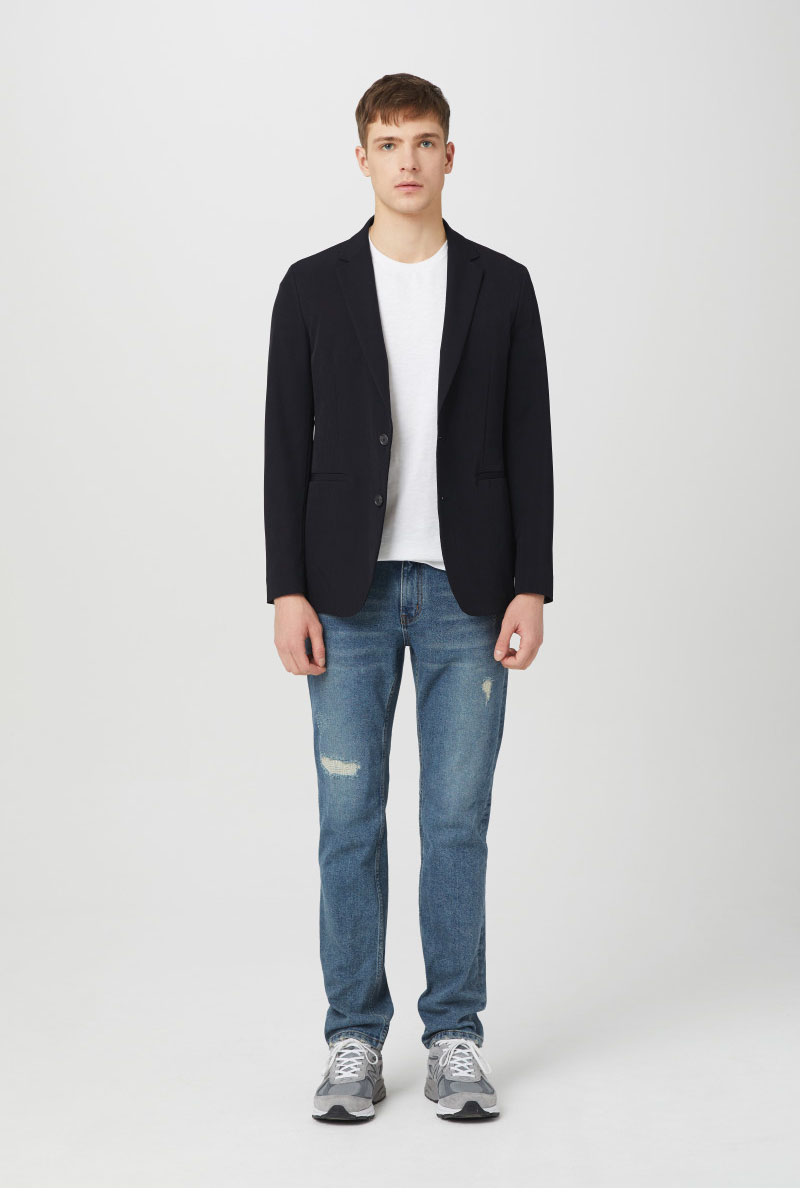

https://www.lfmall.co.kr/product.do?cmd=getProductDetail&PROD_CD=JNJA9B583N3&etag1=004_A011_E043&etag2=0&etag3=23&etag4=1017


In [86]:
# 예측 한 값에 맞게 코디 추천
# ["T-Shirt", "Trouser", "Coat", "Pullover", "Shirt"]
# ex>> 바지로 분류가 된다면! 바지에 해당하는 코디 셋 이미지 5개 정도 띄워주기..
# 하나의 브랜드 예시를 잡는게 중요할 듯. (브랜드 정하기!)
# 브랜드 의 바지 코디셋 사진과 그 바지 코디셋 URL 찾기.

# 티셔츠로 분류 했다면 티셔츠와 관련된 코디 셋 (일단..)두가지 찾기.

import glob
import random

def recommend(predict_idx):
    if predict_idx == 0:

        t_shirt_path = glob.glob("/content/drive/My Drive/Colab Notebooks/반팔티코디예시/*.jpg")

        # 코디 예시 사진과 url은 (브랜드 - 질 스튜어트 뉴욕)
        t_shirt_cody_url_list = ["https://www.lfmall.co.kr/product.do?cmd=getProductDetail&PROD_CD=JNJU0D704D2&ITHR_CD=IT0401&etag1=009_A019_E269&etag2=0&etag3=1&etag4=JNTS0B750WT",
                                 "https://www.lfmall.co.kr/product.do?cmd=getProductDetail&origin=outlet&PROD_CD=WYPA9B083T2&ITHR_CD=IT0401",
                                 "https://www.lfmall.co.kr/product.do?cmd=getProductDetail&PROD_CD=JNJA9B583N3&etag1=004_A011_E043&etag2=0&etag3=23&etag4=1017"]
        
        t_shirt_img_url_list = []

        for idx, img in enumerate(t_shirt_path):
            t_shirt = cv2.imread(img)
            t_shirt_img_url_list.append([t_shirt, t_shirt_cody_url_list[idx]])

        return t_shirt_img_url_list

    elif predict_idx == 1:
        pass

    elif predict_idx == 2:
        pass

    elif predict_idx == 3:
        pass

    elif predict_idx == 4:
        pass

# recommend return 값 받기
recommend_img_url_list = recommend(predict_idx)

# 랜덤초이스방법
random_choice = random.choice(recommend_img_url_list)
random_img, random_url = random_choice
cv2_imshow(random_img)
print(random_url)
print('*'*150)
print('*'*150)
print('*'*150)
print('*'*150)

# 3가지 종류 그냥 출력해주기.
recommend_img_list = []
recommend_url_list = []
for img, url in recommend_img_url_list:
    recommend_img_list.append(img)
    recommend_url_list.append(url)

# 이미지 변수 하나에 담기
recommend_img1, recommend_img2, recommend_img3 = recommend_img_list
# # url 변수 하나에 담기
recommend_url1, recommend_url2, recommend_url3 = recommend_url_list

cv2_imshow(recommend_img1)
print(recommend_url1)

cv2_imshow(recommend_img2)
print(recommend_url2)

cv2_imshow(recommend_img3)
print(recommend_url3)